数据导入与分析

In [1]:
import pandas as pd
import numpy as np

x_train = pd.read_csv('./train_final.csv', engine='python')
x_test = pd.read_csv('./test_final.csv', engine='python')

TRAIN_IDX=x_train.shape[0]
print(TRAIN_IDX)
TEST_IDX = TRAIN_IDX + x_test.shape[0]
print(TEST_IDX)
print(x_train.columns.to_list())

print(list(set(x_train.columns.to_list()) - set(x_test.columns.to_list())))

50000
100000
['continuous_annual_inc', 'continuous_annual_inc_joint', 'continuous_delinq_2yrs', 'continuous_dti', 'continuous_dti_joint', 'continuous_fico_range_high', 'continuous_fico_range_low', 'continuous_funded_amnt', 'continuous_funded_amnt_inv', 'continuous_inq_last_6mths', 'continuous_installment', 'continuous_int_rate', 'continuous_last_fico_range_high', 'continuous_last_fico_range_low', 'continuous_loan_amnt', 'loan_status', 'continuous_mths_since_last_delinq', 'continuous_mths_since_last_major_derog', 'continuous_mths_since_last_record', 'continuous_open_acc', 'continuous_pub_rec', 'discrete_addr_state_1_one_hot', 'discrete_addr_state_2_one_hot', 'discrete_addr_state_3_one_hot', 'discrete_addr_state_4_one_hot', 'discrete_addr_state_5_one_hot', 'discrete_addr_state_6_one_hot', 'discrete_addr_state_7_one_hot', 'discrete_addr_state_8_one_hot', 'discrete_addr_state_9_one_hot', 'discrete_addr_state_10_one_hot', 'discrete_addr_state_11_one_hot', 'discrete_addr_state_12_one_hot', '

In [ ]:
训练数据与测试数据量都是50000,特征数据一致，发现其中不少one_hot值，进一步分析

In [14]:
print(x_train['loan_status'].unique())
print('\n')
print(x_train['loan_status'].value_counts())

[1 0]


1    39788
0    10212
Name: loan_status, dtype: int64


标签无异常数值，比例接近4：1

In [2]:
import lightgbm as lgb

# train_dataset = lgb.Dataset(x_train.drop(columns='loan_status'), x_train['loan_status'])
# test_dataset = lgb.Dataset(x_train.drop(columns='loan_status'), x_train['loan_status'])

特征 continuous_last_fico_range_high 重要度为 415.000000
特征 continuous_dti 重要度为 293.000000
特征 continuous_installment 重要度为 222.000000
特征 continuous_mths_since_last_delinq 重要度为 196.000000
特征 continuous_annual_inc 重要度为 175.000000
特征 continuous_fico_range_high 重要度为 165.000000
特征 continuous_int_rate 重要度为 138.000000
特征 continuous_open_acc 重要度为 130.000000
特征 continuous_mths_since_last_major_derog 重要度为 121.000000
特征 continuous_mths_since_last_record 重要度为 121.000000
特征 continuous_funded_amnt 重要度为 109.000000
特征 discrete_term_1_one_hot 重要度为 100.000000
特征 discrete_emp_length_12_one_hot 重要度为 94.000000
特征 continuous_funded_amnt_inv 重要度为 69.000000
特征 continuous_inq_last_6mths 重要度为 54.000000
特征 discrete_home_ownership_1_one_hot 重要度为 30.000000
特征 continuous_delinq_2yrs 重要度为 19.000000
特征 discrete_purpose_1_one_hot 重要度为 18.000000
特征 discrete_purpose_5_one_hot 重要度为 16.000000
特征 discrete_addr_state_15_one_hot 重要度为 15.000000
特征 discrete_emp_length_1_one_hot 重要度为 15.000000
特征 discrete_addr_state_8_one_hot 重要度为 14.

([<matplotlib.axis.XTick at 0x16b6ad8a910>,
 [Text(0, 0, 'continuous_last_fico_range_high'),
  Text(1, 0, 'continuous_dti'),
  Text(2, 0, 'continuous_installment'),
  Text(3, 0, 'continuous_mths_since_last_delinq'),
  Text(4, 0, 'continuous_annual_inc'),
  Text(5, 0, 'continuous_fico_range_high'),
  Text(6, 0, 'continuous_int_rate'),
  Text(7, 0, 'continuous_open_acc'),
  Text(8, 0, 'continuous_mths_since_last_major_derog'),
  Text(9, 0, 'continuous_mths_since_last_record'),
  Text(10, 0, 'continuous_funded_amnt'),
  Text(11, 0, 'discrete_term_1_one_hot'),
  Text(12, 0, 'discrete_emp_length_12_one_hot'),
  Text(13, 0, 'continuous_funded_amnt_inv'),
  Text(14, 0, 'continuous_inq_last_6mths'),
  Text(15, 0, 'discrete_home_ownership_1_one_hot'),
  Text(16, 0, 'continuous_delinq_2yrs'),
  Text(17, 0, 'discrete_purpose_1_one_hot'),
  Text(18, 0, 'discrete_purpose_5_one_hot'),
  Text(19, 0, 'discrete_addr_state_15_one_hot'),
  Text(20, 0, 'discrete_emp_length_1_one_hot'),
  Text(21, 0, 'disc

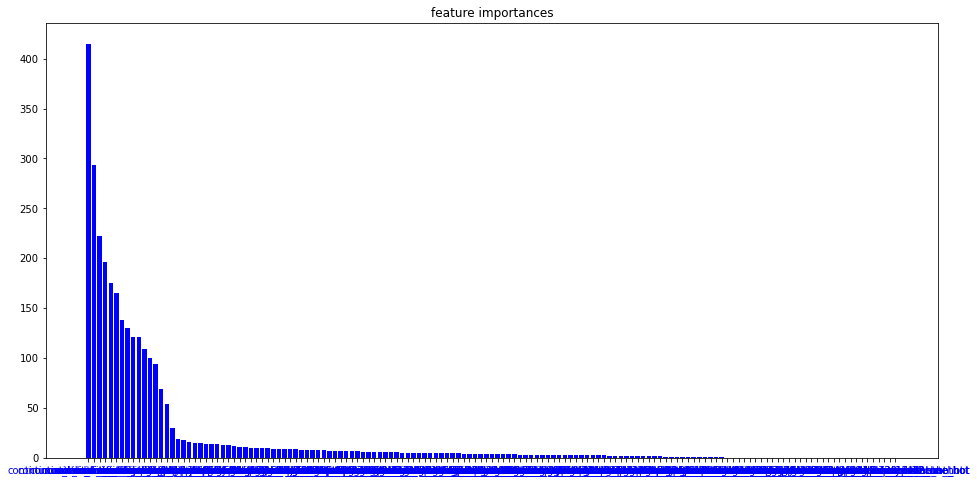

In [6]:
# 特征重要度排序

train_lebal = x_train['loan_status']
train = x_train.drop(columns='loan_status')
lgbm_model = lgb.LGBMClassifier().fit(train.values,train_lebal)
feature_names = ["continuous_annual_inc","continuous_annual_inc_joint","continuous_delinq_2yrs","continuous_dti","continuous_dti_joint","continuous_fico_range_high","continuous_fico_range_low","continuous_funded_amnt","continuous_funded_amnt_inv","continuous_inq_last_6mths","continuous_installment","continuous_int_rate","continuous_last_fico_range_high","continuous_last_fico_range_low","continuous_loan_amnt","continuous_mths_since_last_delinq","continuous_mths_since_last_major_derog","continuous_mths_since_last_record","continuous_open_acc","continuous_pub_rec","discrete_addr_state_1_one_hot","discrete_addr_state_2_one_hot","discrete_addr_state_3_one_hot","discrete_addr_state_4_one_hot","discrete_addr_state_5_one_hot","discrete_addr_state_6_one_hot","discrete_addr_state_7_one_hot","discrete_addr_state_8_one_hot","discrete_addr_state_9_one_hot","discrete_addr_state_10_one_hot","discrete_addr_state_11_one_hot","discrete_addr_state_12_one_hot","discrete_addr_state_13_one_hot","discrete_addr_state_14_one_hot","discrete_addr_state_15_one_hot","discrete_addr_state_16_one_hot","discrete_addr_state_17_one_hot","discrete_addr_state_18_one_hot","discrete_addr_state_19_one_hot","discrete_addr_state_20_one_hot","discrete_addr_state_21_one_hot","discrete_addr_state_22_one_hot","discrete_addr_state_23_one_hot","discrete_addr_state_24_one_hot","discrete_addr_state_25_one_hot","discrete_addr_state_26_one_hot","discrete_addr_state_27_one_hot","discrete_addr_state_28_one_hot","discrete_addr_state_29_one_hot","discrete_addr_state_30_one_hot","discrete_addr_state_31_one_hot","discrete_addr_state_32_one_hot","discrete_addr_state_33_one_hot","discrete_addr_state_34_one_hot","discrete_addr_state_35_one_hot","discrete_addr_state_36_one_hot","discrete_addr_state_37_one_hot","discrete_addr_state_38_one_hot","discrete_addr_state_39_one_hot","discrete_addr_state_40_one_hot","discrete_addr_state_41_one_hot","discrete_addr_state_42_one_hot","discrete_addr_state_43_one_hot","discrete_addr_state_44_one_hot","discrete_addr_state_45_one_hot","discrete_addr_state_46_one_hot","discrete_addr_state_47_one_hot","discrete_addr_state_48_one_hot","discrete_addr_state_49_one_hot","discrete_application_type_1_one_hot","discrete_application_type_2_one_hot","discrete_emp_length_1_one_hot","discrete_emp_length_2_one_hot","discrete_emp_length_3_one_hot","discrete_emp_length_4_one_hot","discrete_emp_length_5_one_hot","discrete_emp_length_6_one_hot","discrete_emp_length_7_one_hot","discrete_emp_length_8_one_hot","discrete_emp_length_9_one_hot","discrete_emp_length_10_one_hot","discrete_emp_length_11_one_hot","discrete_emp_length_12_one_hot","discrete_grade_1_one_hot","discrete_grade_2_one_hot","discrete_grade_3_one_hot","discrete_grade_4_one_hot","discrete_grade_5_one_hot","discrete_grade_6_one_hot","discrete_grade_7_one_hot","discrete_home_ownership_1_one_hot","discrete_home_ownership_2_one_hot","discrete_home_ownership_3_one_hot","discrete_home_ownership_4_one_hot","discrete_policy_code_1_one_hot","discrete_purpose_1_one_hot","discrete_purpose_2_one_hot","discrete_purpose_3_one_hot","discrete_purpose_4_one_hot","discrete_purpose_5_one_hot","discrete_purpose_6_one_hot","discrete_purpose_7_one_hot","discrete_purpose_8_one_hot","discrete_purpose_9_one_hot","discrete_purpose_10_one_hot","discrete_purpose_11_one_hot","discrete_purpose_12_one_hot","discrete_pymnt_plan_1_one_hot","discrete_sub_grade_1_one_hot","discrete_sub_grade_2_one_hot","discrete_sub_grade_3_one_hot","discrete_sub_grade_4_one_hot","discrete_sub_grade_5_one_hot","discrete_sub_grade_6_one_hot","discrete_sub_grade_7_one_hot","discrete_sub_grade_8_one_hot","discrete_sub_grade_9_one_hot","discrete_sub_grade_10_one_hot","discrete_sub_grade_11_one_hot","discrete_sub_grade_12_one_hot","discrete_sub_grade_13_one_hot","discrete_sub_grade_14_one_hot","discrete_sub_grade_15_one_hot","discrete_sub_grade_16_one_hot","discrete_sub_grade_17_one_hot","discrete_sub_grade_18_one_hot","discrete_sub_grade_19_one_hot","discrete_sub_grade_20_one_hot","discrete_sub_grade_21_one_hot","discrete_sub_grade_22_one_hot","discrete_sub_grade_23_one_hot","discrete_sub_grade_24_one_hot","discrete_sub_grade_25_one_hot","discrete_sub_grade_26_one_hot","discrete_sub_grade_27_one_hot","discrete_sub_grade_28_one_hot","discrete_sub_grade_29_one_hot","discrete_sub_grade_30_one_hot","discrete_sub_grade_31_one_hot","discrete_sub_grade_32_one_hot","discrete_sub_grade_33_one_hot","discrete_sub_grade_34_one_hot","discrete_sub_grade_35_one_hot","discrete_term_1_one_hot","discrete_term_2_one_hot"]
feature_importances = lgbm_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

import_listName_sort = []
for index in indices:
    print("特征 %s 重要度为 %f" %(feature_names[index], feature_importances[index]))
    import_listName_sort.append(feature_names[index])

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("feature importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')

In [7]:
len(import_listName_sort)

145

In [8]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


In [9]:
# 原结果
x_train_copy = x_train.copy()
x_lebal = x_train['loan_status']
del x_train_copy['loan_status']

In [10]:
# 选取前N个重要特征进行实验
import_feature_names = import_listName_sort[0:-1]
import_feature_names.append("loan_status")
import_feature_train = x_train[import_feature_names]
train_lebal = import_feature_train['loan_status']
del import_feature_train['loan_status']
print(import_feature_train.values)
print(train_lebal)

[[5.64000e+02 5.91000e+00 1.23030e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.99000e+02 1.60600e+01 8.20280e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [7.04000e+02 1.07800e+01 4.32660e+02 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [6.89000e+02 9.06000e+00 6.82060e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [8.19000e+02 7.39000e+00 1.12919e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [7.49000e+02 1.32000e+01 9.93800e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: loan_status, Length: 50000, dtype: int64


In [11]:
parameters={}

gbm = lgb.LGBMClassifier(subsample= 0.2, max_depth= 5, num_thread= 4, num_leaves= 10, metric= 'binary', 
                         objective= 'binary', num_round= 500, learning_rate= 0.015, feature_fraction= 0.61,
                         bagging_fraction= 0.7,bagging_fraction_seed=123,feature_fraction_seed=123 ,
                         bagging_freq = 5,cat_smooth=1, colsample_bytree= 0.6, lambda_l1= 0.6, 
                         min_data_in_leaf= 20, min_split_gain=0.1)

gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=5)
gsearch.fit(import_feature_train.values, np.ravel(train_lebal))
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500
参数的最佳取值:{}
最佳模型得分:0.9613276153533576
[0.96132762]
[{}]


In [ ]:
最佳模型得分:0.9613276153533576	采用特征数量:ALL
最佳模型得分:0.9611845817285081	采用特征数量:20
最佳模型得分:0.9612116569954869	采用特征数量:30
最佳模型得分:0.9612714862250502	采用特征数量:35
最佳模型得分:0.9612586981260185	采用特征数量:36
最佳模型得分:0.9610713919181799	采用特征数量:40
最佳模型得分:0.9612316355516818	采用特征数量:50
最佳模型得分:0.9612475219274454	采用特征数量:55
最佳模型得分:0.9611389444369045	采用特征数量:56
最佳模型得分:0.9612136880518696	采用特征数量:60
最佳模型得分:0.9611954272990767	采用特征数量:70

发现大部分特征重要程度极低，其中主要是one_hot编码导致,尝试合并one_hot编码

In [12]:
discrete_emp_length = x_train.filter(like='discrete_emp_length')
print(discrete_emp_length)

       discrete_emp_length_1_one_hot  discrete_emp_length_2_one_hot  \
0                                  1                              0   
1                                  1                              0   
2                                  1                              0   
3                                  0                              1   
4                                  0                              0   
...                              ...                            ...   
49995                              0                              1   
49996                              0                              0   
49997                              0                              0   
49998                              1                              0   
49999                              0                              0   

       discrete_emp_length_3_one_hot  discrete_emp_length_4_one_hot  \
0                                  0                              0   
1    

In [13]:
# discrete_emp_length_one_hot 累加合并
discrete_emp_length = x_train.filter(like='discrete_emp_length')

tmp_list=[]
for index, row in discrete_emp_length.iterrows():
    tmp_list.append(np.argmax(row))
# 增加一个新特征"discrete_emp_length"
import_feature_train['discrete_emp_length'] = tmp_list

<ipython-input-13-be994707ad3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import_feature_train['discrete_emp_length'] = tmp_list


In [14]:
# discrete_term_one_hot 累加合并
discrete_term = x_train.filter(like='discrete_term')

tmp_list=[]
for index, row in discrete_term.iterrows():
    tmp_list.append(np.argmax(row))
    

import_feature_train['discrete_term'] = tmp_list

合并两个one_hot变量之后，训练模型最佳模型得分:0.961335031019232，相比原最优得分:0.9613276153533576高了一点点，事实证明此特征有效。

In [15]:
# 将所有one_hot合并，增加新特征

# discrete_addr_state_2_one_hot
discrete_addr_state = x_train.filter(like='discrete_addr_state')
tmp_list=[]
for index, row in discrete_addr_state.iterrows():
    tmp_list.append(np.argmax(row))
import_feature_train['discrete_addr_state'] = tmp_list

# discrete_grade_1_one_hot
discrete_grade = x_train.filter(like='discrete_grade')
tmp_list=[]
for index, row in discrete_grade.iterrows():
    tmp_list.append(np.argmax(row)) 
import_feature_train['discrete_grade'] = tmp_list


# discrete_purpose_1_one_hot
discrete_purpose = x_train.filter(like='discrete_purpose')
tmp_list=[]
for index, row in discrete_purpose.iterrows():
    tmp_list.append(np.argmax(row))
import_feature_train['discrete_purpose'] = tmp_list


# discrete_sub_grade_1_one_hot
discrete_sub_grade = x_train.filter(like='discrete_sub_grade_')
tmp_list=[]
for index, row in discrete_sub_grade.iterrows():
    tmp_list.append(np.argmax(row)) 
import_feature_train['discrete_sub_grade'] = tmp_list


# discrete_home_ownership_1_one_hot
discrete_home_ownership = x_train.filter(like='discrete_home_ownership')
tmp_list=[]
for index, row in discrete_home_ownership.iterrows():
    tmp_list.append(np.argmax(row))
import_feature_train['discrete_home_ownership'] = tmp_list

In [16]:
parameters={}

gbm = lgb.LGBMClassifier(subsample= 0.2, max_depth= 5, num_thread= 4, num_leaves= 10, metric= 'binary', 
                         objective= 'binary', num_round= 500, learning_rate= 0.015, feature_fraction= 0.61,
                         bagging_fraction= 0.7,bagging_fraction_seed=123,feature_fraction_seed=123 ,
                         bagging_freq = 5,cat_smooth=1, colsample_bytree= 0.6, lambda_l1= 0.6, 
                         min_data_in_leaf= 20, min_split_gain=0.1)

gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=5)
gsearch.fit(import_feature_train.values, np.ravel(train_lebal))
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_round=500 will be ignored. Current value: num_iterations=500
参数的最佳取值:{}
最佳模型得分:0.9613532607589038
[0.96135326]
[{}]


将所有one_hot编码数据进行合并，新的特征让模型得分从 0.9613276153533576 提升到 0.9613532607589038 ，小幅度提升。
接下来进一步进行调参。 

In [20]:
parameters = {
    'max_depth': [7,6,5,4],
    'num_round': [600,700,800],
    'num_leaves': [7,8,9,10],
    'learning_rate': [0.01,0.015,0.02],

}

gbm = lgb.LGBMClassifier(subsample= 0.2, max_depth= 5, num_thread= 4, num_leaves= 10, metric= 'binary', 
                         objective= 'binary', num_round= 500, learning_rate= 0.015, feature_fraction= 0.61,
                         bagging_fraction= 0.7,bagging_fraction_seed=123,feature_fraction_seed=123 ,
                         bagging_freq = 5,cat_smooth=1, colsample_bytree= 0.6, lambda_l1= 0.6, 
                         min_data_in_leaf= 20, min_split_gain=0.1)

gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=5)
gsearch.fit(import_feature_train.values, np.ravel(train_lebal))
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be

H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=600, num_round=600 will be ignored. Current value: num_iterations=600


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=800, num_round=800 will be ignored. Current value: num_iterations=800


H:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_threads is set with n_jobs=-1, num_thread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.61, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.61
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.2 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=700, num_round=700 will be ignored. Current value: num_iterations=700
参数的最佳取值:{'learning_rate': 0.015, 'max_depth': 5, 'num_leaves': 9, 'num_round': 700}
最佳模型得分:0.9614244246007301
[0.96103326 0.96119428 0.96126572 0.96112883 0.96128034 0.96132051
 0.96116725 0.9612

最佳模型得分:0.9614244246007301，参数的最佳取值:{'learning_rate': 0.015, 'max_depth': 5, 'num_leaves': 9, 'num_round': 700}，模型进一步小幅度提升。